In [ ]:
# Dépendances
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def center_compare(center, pixel_list):
    return [1 if pixel >= center else 0 for pixel in pixel_list]

In [ ]:
def get_pixel(map, x, y):
    try:
        return map[x, y]
    except IndexError:
        return 0

In [ ]:
def binary2decimal(binary_list):
    binary_list.reverse()
    ans = 0
    factor = 1
    for i in binary_list:
        ans += i*factor
        factor*=2
    return ans

# Nouvelle section

In [ ]:
img = cv2.imread('./drive/MyDrive/Colab Notebooks/cbk.jpeg', cv2.IMREAD_GRAYSCALE)
img_lbp = cv2.imread('./drive/MyDrive/Colab Notebooks/laf.jpeg', cv2.IMREAD_GRAYSCALE)

In [ ]:
height, width = img.shape
img.shape

(558, 992)

In [ ]:
for x in range(0, height):
    for y in range(0, width):
        center = img[x, y]
        top_left = get_pixel(img, x-1, y-1)
        top_up = get_pixel(img, x, y-1)
        top_right = get_pixel(img, x+1, y-1)
        left = get_pixel(img, x-1, y)
        right = get_pixel(img, x+1, y)
        bottom_left = get_pixel(img, x-1, y+1)
        bottom_down = get_pixel(img, x, y+1)
        bottom_right = get_pixel(img, x+1, y+1)

        neighbor_list = [top_left, top_up, top_right, right, bottom_right, bottom_down, bottom_left, left]
        binary_list = center_compare(center, neighbor_list)
        decimal_value = binary2decimal(binary_list)
        img_lbp.itemset((x, y), decimal_value)

In [ ]:
cv2.imwrite('./test_images/002_lbp.png', img_lbp)

True

In [ ]:
hist, bins = np.histogram(img.flatten(), 256, [0,256])
hist_lbp, bins_lbp = np.histogram(img_lbp.flatten(), 256, [0,256])

cfd = hist.cumsum() #calculate the Cumulative Frequency Distribution
cfd_lbp = hist_lbp.cumsum()
cfd_normalized = cfd * hist.max()/cfd.max()
cfd_lbp_normalized = cfd_lbp * hist_lbp.max()/cfd_lbp.max()

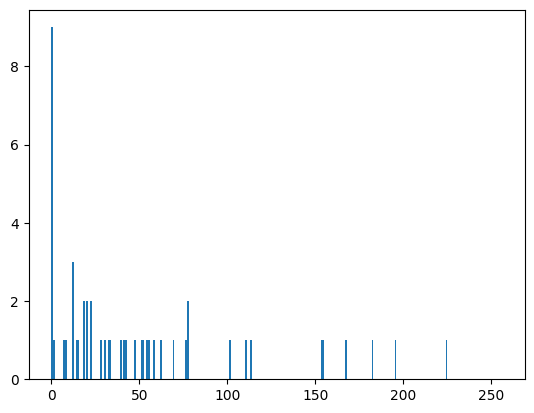

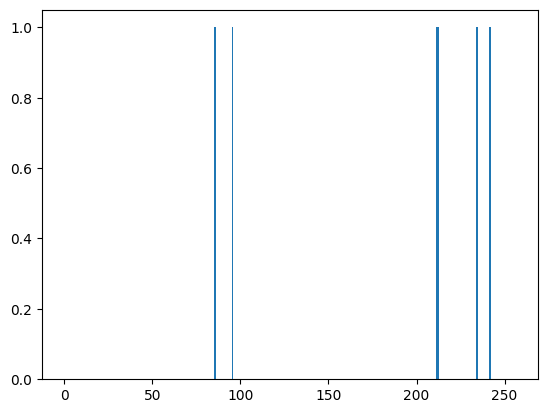

In [ ]:
plt.figure()
plt.hist(hist, bins)
plt.savefig('002_hist.png')
plt.figure()
plt.hist(hist_lbp, bins_lbp)
plt.savefig('002_lbp_hist.png')